<a href="https://colab.research.google.com/github/AMR-21/Magic-Gamma-Telescope-Classification/blob/main/classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Imports

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from collections import Counter
import seaborn as sns
from imblearn.under_sampling import RandomUnderSampler
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, confusion_matrix,accuracy_score,recall_score
from mlxtend.plotting import plot_confusion_matrix
from sklearn.ensemble import AdaBoostClassifier
from sklearn.model_selection import StratifiedKFold
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB

# Data Initialization

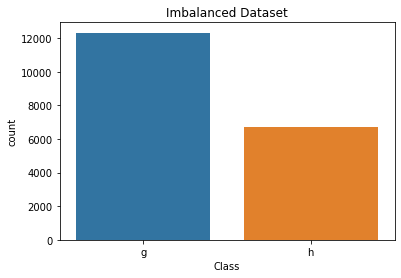

g    12332
h     6688
Name: class, dtype: int64


,fLength,fWidth,fSize,fConc,fConc1,fAsym,fM3Long,fM3Trans,fAlpha,fDist,class
0,28.7967,16.0021,2.6449,0.3918,0.1982,27.7004,22.0110,-8.2027,40.0920,81.8828,g
1,31.6036,11.7235,2.5185,0.5303,0.3773,26.2722,23.8238,-9.9574,6.3609,205.2610,g
2,162.0520,136.0310,4.0612,0.0374,0.0187,116.7410,-64.8580,-45.2160,76.9600,256.7880,g
3,23.8172,9.5728,2.3385,0.6147,0.3922,27.2107,-6.4633,-7.1513,10.4490,116.7370,g
4,75.1362,30.9205,3.1611,0.3168,0.1832,-5.5277,28.5525,21.8393,4.6480,356.4620,g
...,...,...,...,...,...,...,...,...,...,...,...
19015,21.3846,10.9170,2.6161,0.5857,0.3934,15.2618,11.5245,2.8766,2.4229,106.8258,h
19016,28.9452,6.7020,2.2672,0.5351,0.2784,37.0816,13.1853,-2.9632,86.7975,247.4560,h
19017,75.4455,47.5305,3.4483,0.1417,0.0549,-9.3561,41.0562,-9.4662,30.2987,256.5166,h
19018,120.5135,76.9018,3.9939,0.0944,0.0683,5.8043,-93.5224,-63.8389,84.6874,408.3166,h


In [ ]:
names= ['fLength', 'fWidth', 'fSize', 'fConc', 'fConc1', 'fAsym', 'fM3Long', 'fM3Trans', 'fAlpha', 'fDist',
'class']

imbalancedDataset = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/magic/magic04.data',names=names)


X = imbalancedDataset.drop(columns=['class'])
Y = imbalancedDataset['class']

plot = sns.countplot(x=Y)
plt.title('Imbalanced Dataset')
plt.xlabel('Class')
plt.show()
print(Y.value_counts())
imbalancedDataset

# Data Balancing

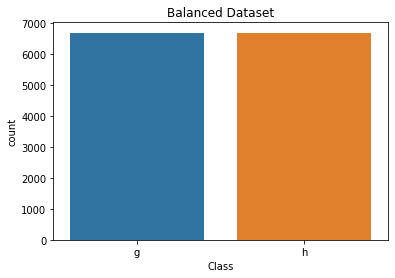

g    6688
h    6688
Name: class, dtype: int64


,fLength,fWidth,fSize,fConc,fConc1,fAsym,fM3Long,fM3Trans,fAlpha,fDist,class
0,41.8269,26.3680,3.0422,0.2350,0.1202,24.1335,40.1360,20.4737,29.3920,173.6130,g
1,59.0164,18.0200,3.3073,0.2587,0.1422,57.7010,59.9175,15.4044,1.3107,237.6220,g
2,15.0205,12.1918,2.3560,0.6608,0.3370,1.9014,-2.0715,3.6258,89.2740,105.2140,g
3,51.4720,10.4108,2.5453,0.3276,0.1838,73.5451,17.7028,-7.1886,16.7782,176.5590,g
4,25.3814,15.7361,2.6186,0.4188,0.2419,27.8332,17.8775,5.4552,10.1725,80.3929,g
...,...,...,...,...,...,...,...,...,...,...,...
13371,21.3846,10.9170,2.6161,0.5857,0.3934,15.2618,11.5245,2.8766,2.4229,106.8258,h
13372,28.9452,6.7020,2.2672,0.5351,0.2784,37.0816,13.1853,-2.9632,86.7975,247.4560,h
13373,75.4455,47.5305,3.4483,0.1417,0.0549,-9.3561,41.0562,-9.4662,30.2987,256.5166,h
13374,120.5135,76.9018,3.9939,0.0944,0.0683,5.8043,-93.5224,-63.8389,84.6874,408.3166,h


In [ ]:
# Undersampling
under_sampler = RandomUnderSampler(random_state=42)
X,Y = under_sampler.fit_resample(X,Y)

plot = sns.countplot(x=Y)
plt.title('Balanced Dataset')
plt.xlabel('Class')
plt.show()
print(Y.value_counts())

balanced = X.copy()
balanced['class'] = Y
balanced

# Data Splitting

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X,Y, train_size=0.7001,stratify=Y)

print("Training set")
print(y_train.value_counts())

training = X_train.copy()
training['class'] = y_train

training


Training set
h    4682
g    4682
Name: class, dtype: int64


,fLength,fWidth,fSize,fConc,fConc1,fAsym,fM3Long,fM3Trans,fAlpha,fDist,class
10107,11.8752,8.2930,2.4356,0.8286,0.5191,-14.8796,-14.1552,12.4139,10.7937,165.4350,h
10686,142.8720,110.8500,4.4417,0.0431,0.0231,5.3578,88.0680,65.5750,81.3496,267.8280,h
766,59.7010,22.4834,2.8837,0.1948,0.0987,66.0918,57.6959,-12.1468,8.8060,246.5250,g
5252,32.5654,14.1048,2.6405,0.4119,0.2551,-3.3464,-12.1459,-6.3803,6.4230,192.8610,g
3042,12.6594,11.7413,2.1351,0.7033,0.3846,-15.8596,9.4522,-8.7126,43.5434,227.7110,g
...,...,...,...,...,...,...,...,...,...,...,...
11327,19.9786,9.2008,2.4346,0.6507,0.4283,-4.1789,14.4521,10.3094,78.2768,32.3245,h
6222,23.7753,0.0000,2.0550,0.7225,0.3656,0.0000,0.0000,-12.3998,38.3080,165.5480,g
471,13.0074,10.3181,2.1658,0.7782,0.5222,-12.3937,-6.2722,8.0804,79.7945,47.4910,g
5581,20.7684,8.9999,2.3243,0.6398,0.3341,25.2421,7.7059,1.5777,74.3421,93.6780,g


# Folding, Tuning, and Cross-Validation

In [ ]:
def generateFolds():
  X_tra = X_train.copy()
  y_tra  = y_train.copy()
  X_tra['class'] = y_tra
  X_tra = X_tra.sample(frac = 1)
  X_tra=X_tra.groupby('class').sample(4682)
  X_tra = X_tra.reset_index(drop=True)

  X_traing = X_tra[0:4682]
  X_trainh = X_tra[4682:9364]
  X_trainh = X_trainh.reset_index(drop=True)

  #folds  
  frame1 = [X_traing.loc[0:935],X_trainh.loc[0:935]]
  fold1 = pd.concat(frame1)

  frame2 = [X_traing.loc[936:1871],X_trainh.loc[936:1871]]
  fold2 = pd.concat(frame2)    

  frame3 = [X_traing.loc[1872:2807],X_trainh.loc[1872:2807]]
  fold3 = pd.concat(frame3)    

  frame4 = [X_traing.loc[2808:3743],X_trainh.loc[2808:3743]]
  fold4 = pd.concat(frame4)    

  frame5 = [X_traing.loc[3744:],X_trainh.loc[3744:]]
  fold5 = pd.concat(frame5)

  train_val1 = pd.concat([fold1, fold2, fold3, fold4])
  test_val1 = fold5

  train_val2 = pd.concat([fold1, fold2, fold3, fold5])
  test_val2 = fold4

  train_val3 = pd.concat([fold1, fold2, fold4, fold5])
  test_val3 = fold3

  train_val4 = pd.concat([fold1, fold3, fold4, fold5])
  test_val4 = fold2

  train_val5 = pd.concat([fold2, fold3, fold4, fold5])
  test_val5 = fold1

  return (train_val1,test_val1),(train_val2,test_val2),(train_val3,test_val3),(train_val4,test_val4),(train_val5,test_val5)

def plotAccuarcy(x,y,label):
  fig,ax= plt.subplots()
  plt.style.use('ggplot')
  ax.plot(x,y);
  ax.set_title('Cross-Validation plot')
  ax.set_xlabel(label)
  ax.set_ylabel('mean accuarcy');

def tuneModel(model,param):
  parameter = tuple(param.keys())[0]
  values = tuple(param.values())[0]

  results = {}
  for v in values:
    accuarcy = []
    params = {parameter:v}
    model.set_params(**params)
    for train,test in folds:
      y = train['class']
      x = train.drop(columns=['class'])
      ytest = test['class']
      test = test.drop(columns=['class'])

      model.fit(x,y)
      pred = model.predict(test)
      accuarcy.append(accuracy_score(ytest, pred))
    results[v] = sum(accuarcy)/len(accuarcy)
  
  params = list(results.keys())
  avgMean = list(results.values())

  maxAcc = max(avgMean)
  index = avgMean.index(maxAcc)

  plotAccuarcy(params,avgMean,parameter)

  bestParameter = {parameter:params[index]}
  model.set_params(**bestParameter)

  best_parameter={"best_parameter":params[index]}
  best_score = {"best_score":maxAcc}

  return model,best_parameter,best_score,results

folds = generateFolds()

# Classifiers

In [ ]:
def analyze(pred):
  print('Accuracy: ',accuracy_score(y_test, pred)*100 ,"%")
  print(classification_report(y_test, pred))


  fig, ax = plot_confusion_matrix(conf_mat= confusion_matrix(y_test, pred), figsize=(4, 4), cmap=plt.cm.Blues)
  ax.set_xticklabels(['', 'g', 'h'])
  ax.set_yticklabels(['', 'g', 'h']);
  plt.xlabel('Predictions', fontsize=18)
  plt.ylabel('Actuals', fontsize=18)
  plt.title('Confusion Matrix', fontsize=18)
  plt.show()


### Decision Tree

Accuracy:  79.31206380857428 %
              precision    recall  f1-score   support

           g       0.79      0.80      0.79      2006
           h       0.80      0.79      0.79      2006

    accuracy                           0.79      4012
   macro avg       0.79      0.79      0.79      4012
weighted avg       0.79      0.79      0.79      4012



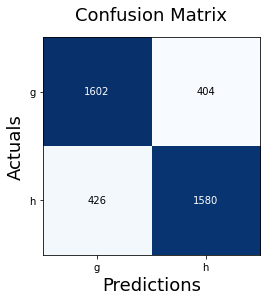

In [ ]:
decision_tree = DecisionTreeClassifier()
decision_tree.fit(X_train, y_train)
dt_pred = decision_tree.predict(X_test)

analyze(dt_pred)


### AdaBoost

#### Estimating value for n_estimators hyperparameter starting from 100 up to 700 with step of 20 then from 194 to 210 with step of 2 then from 196 to 200 with step 1
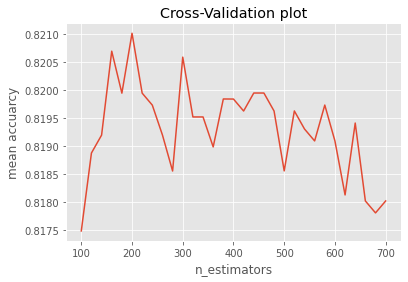 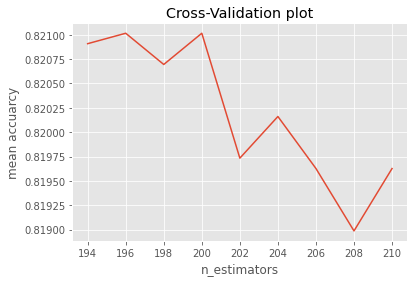

AdaBoostClassifier(n_estimators=196) 0.8210153445228073 

Accuracy:  82.42771684945166 %
              precision    recall  f1-score   support

           g       0.82      0.83      0.83      2006
           h       0.83      0.81      0.82      2006

    accuracy                           0.82      4012
   macro avg       0.82      0.82      0.82      4012
weighted avg       0.82      0.82      0.82      4012



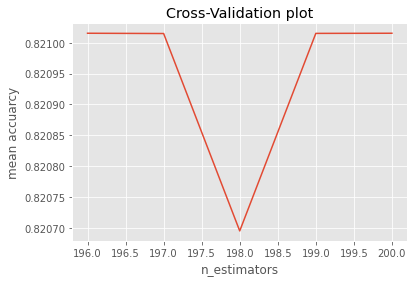

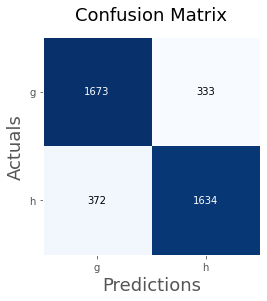

In [ ]:
AdaBoostTune = AdaBoostClassifier()
estimators = np.arange(196,201,1)
AdaBoost,best_parameter,best_score,results = tuneModel(AdaBoostTune,{"n_estimators":estimators})

AdaBoost.fit(X_train, y_train)
ad_pred = AdaBoost.predict(X_test)
print(AdaBoost,best_score['best_score'],"\n")

analyze(ad_pred)


### K-NN

KNeighborsClassifier(n_neighbors=11) 0.7693294060831375 

Accuracy:  77.29312063808574 %
              precision    recall  f1-score   support

           g       0.74      0.84      0.79      2006
           h       0.82      0.70      0.76      2006

    accuracy                           0.77      4012
   macro avg       0.78      0.77      0.77      4012
weighted avg       0.78      0.77      0.77      4012



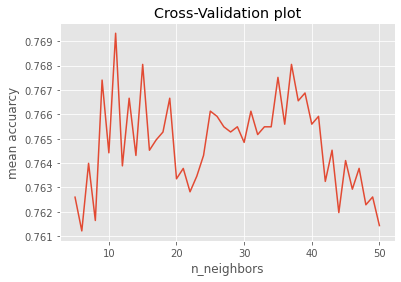

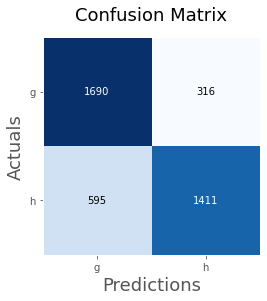

In [ ]:
knnTune = KNeighborsClassifier()
k = np.arange(5, 51, 1)
knn,best_parameter,best_score,results = tuneModel(knnTune,{"n_neighbors":k})

knn.fit(X_train, y_train)
knn_pred = knn.predict(X_test)
print(knn,best_score['best_score'],"\n")

analyze(knn_pred)

### Random Forests

#### Estimating value for n_estimators hyperparameter starting from 100 up to 700 with step of 50 then from 700 to 900 with step of 50 then from 900 to 1200 with step 50, then from 1048 to 1052 with step 1
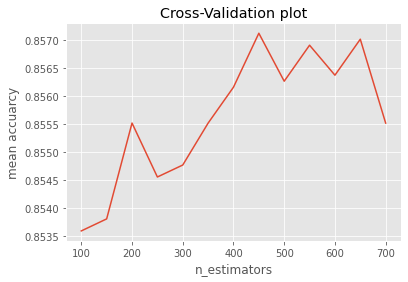 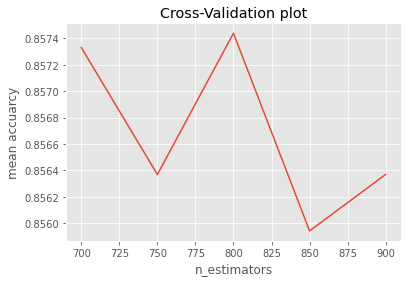 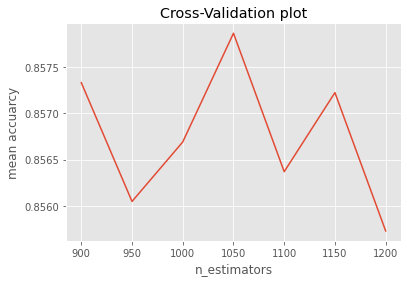

RandomForestClassifier(n_estimators=1048) {'best_score': 0.8570100504801996} 

Accuracy:  86.73978065802592 %
              precision    recall  f1-score   support

           g       0.85      0.90      0.87      2006
           h       0.89      0.84      0.86      2006

    accuracy                           0.87      4012
   macro avg       0.87      0.87      0.87      4012
weighted avg       0.87      0.87      0.87      4012



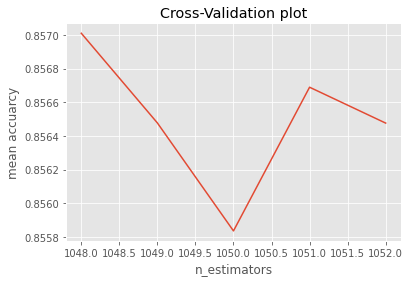

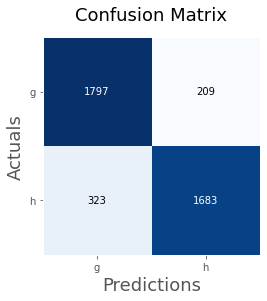

In [ ]:
rfTune = RandomForestClassifier()
restimators = np.arange(1048,1053,1)
rf,best_parameter,best_score,results = tuneModel(rfTune,{"n_estimators":restimators})

rf.fit(X_train, y_train)
rf_pred = rf.predict(X_test)
print(rf,best_score,"\n")

analyze(rf_pred)

### Naive Bayes

Accuracy:  65.55333998005982 %
              precision    recall  f1-score   support

           g       0.60      0.90      0.72      2006
           h       0.81      0.41      0.54      2006

    accuracy                           0.66      4012
   macro avg       0.71      0.66      0.63      4012
weighted avg       0.71      0.66      0.63      4012



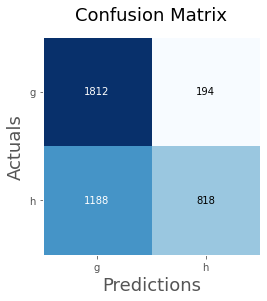

In [ ]:
nb = GaussianNB()
nb.fit(X_train, y_train)
nb_pred = nb.predict(X_test)

analyze(nb_pred)


### NN

In [157]:
y_tr = y_train.copy()

for i in y_tr.index:
  if y_tr[i] == 'g':
    y_tr[i] = 1
  else:
    y_tr[i] = 0

y_ts = y_test.copy()

for i in y_ts.index:
  if y_ts[i] == 'g':
    y_ts[i] = 1.0
  else:
    y_ts[i] = 0.0


X_train_np = X_train.to_numpy()
y_train_np = y_tr.to_numpy().astype(int)[:]

X_test_np = X_test.to_numpy()
y_test_np = y_ts.to_numpy().astype(int)[:]


import torch
from torch.utils.data import TensorDataset
from torchmetrics.classification import BinaryF1Score,BinaryAccuracy,BinaryPrecision,BinaryRecall,BinarySpecificity,BinaryConfusionMatrix

train_dataset = TensorDataset(torch.tensor(X_train_np, dtype=torch.float),
                              torch.tensor(y_train_np, dtype=torch.int))

test_dataset = TensorDataset(torch.tensor(X_test_np, dtype=torch.float),
                              torch.tensor(y_test_np, dtype=torch.int))


from torch.utils.data import DataLoader

train_dataloader = DataLoader(train_dataset, batch_size=128)
test_dataloader = DataLoader(test_dataset, batch_size=128)


from torch import nn


device = 'cuda' if torch.cuda.is_available() else 'cpu'

class NNet(nn.Module):
  def __init__(self):
    super(NNet,self).__init__()
    self.fc1 = nn.Linear(10, 70)
    self.relu1 = nn.ReLU()
    self.fc2 = nn.Linear(70, 30)
    self.relu2 = nn.ReLU()
    self.fc3 = nn.Linear(30, 1)

  def forward(self, x):
    out = self.fc1(x)
    out = self.relu1(out)
    out = self.fc2(out)
    out = self.relu2(out)
    out = self.fc3(out)
    return out

model = NNet().to(device)


loss_fn = nn.MSELoss()
optimizer = torch.optim.Adam(model.parameters(),lr=0.005)

f1 = BinaryF1Score()
accuracy = BinaryAccuracy()
precision = BinaryPrecision()
recall = BinaryRecall()
specificity = BinarySpecificity()
matrix = BinaryConfusionMatrix()


def train(dataLoader,model,loss_fn,optimizer):
  model.train()
  train_loss = 0 

  for i, (X,y) in enumerate(dataLoader):
    X,y =X.to(device),y.to(device)
    y_pred = model(X)
    y = y.unsqueeze(1).float()
    mse = loss_fn(y_pred,y)
    acc = accuracy(y_pred,y)
    train_loss += mse.item()

    optimizer.zero_grad()
    mse.backward()
    optimizer.step()
  
  print(f'''Train set: 
loss: {mse}
accuracy: {acc}
F1: {f1(y_pred,y)}
precision: {precision(y_pred,y)}
recall: {recall(y_pred,y)}
specificity: {specificity(y_pred,y)}
confusion matrix: 
{matrix(y_pred,y)}
''')


def test(dataloader, model, loss_fn):
  model.eval()
  test_loss = 0

  with torch.no_grad():
    for X, y in dataloader:
      X, y = X.to(device), y.to(device)
      y = y.unsqueeze(1).float()
      y_pred= model(X)
      mse = loss_fn(y_pred, y)
      acc = accuracy(y_pred,y)
      test_loss += mse.item()
  
  num_batches = len(dataloader)
  test_mse = test_loss / num_batches

  
  print(f'''Test set: 
loss: {mse}
accuracy: {acc}
F1: {f1(y_pred,y)}
precision: {precision(y_pred,y)}
recall: {recall(y_pred,y)}
specificity: {specificity(y_pred,y)}
confusion matrix: 
{matrix(y_pred,y)}
''')




epochs = 400

for epoch in range(epochs):
  print(f"Epoch {epoch+1}:")
  train(train_dataloader, model, loss_fn, optimizer)
  test(test_dataloader, model, loss_fn)
 


Streaming output truncated to the last 5000 lines.
accuracy: 0.75
F1: 0.8358209133148193
precision: 0.7179487347602844
recall: 1.0
specificity: 0.3125
confusion matrix: 
tensor([[ 5, 11],
        [ 0, 28]])

Epoch 184:
Train set: 
loss: 0.07714848220348358
accuracy: 0.6000000238418579
F1: 0.7333333492279053
precision: 0.5789473652839661
recall: 1.0
specificity: 0.1111111119389534
confusion matrix: 
tensor([[ 1,  8],
        [ 0, 11]])

Test set: 
loss: 0.12101983278989792
accuracy: 0.7045454382896423
F1: 0.8115941882133484
precision: 0.6829268336296082
recall: 1.0
specificity: 0.1875
confusion matrix: 
tensor([[ 3, 13],
        [ 0, 28]])

Epoch 185:
Train set: 
loss: 0.07852520048618317
accuracy: 0.6000000238418579
F1: 0.7333333492279053
precision: 0.5789473652839661
recall: 1.0
specificity: 0.1111111119389534
confusion matrix: 
tensor([[ 1,  8],
        [ 0, 11]])

Test set: 
loss: 0.12288513034582138
accuracy: 0.7045454382896423
F1: 0.8115941882133484
precision: 0.6829268336296082
r